<a href="https://colab.research.google.com/github/eunineelizze/ElizzeAP155/blob/master/Arzaga_AP155_Lab_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Arzaga, Eunine Elizze J.\
_Student No._: 2021-10771\
_Section_: TX- 1

### Submission Information

_Date and Time Submitted (most recent upload)_: 12 December (15:24)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Eunine Elizze J. Arzaga

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

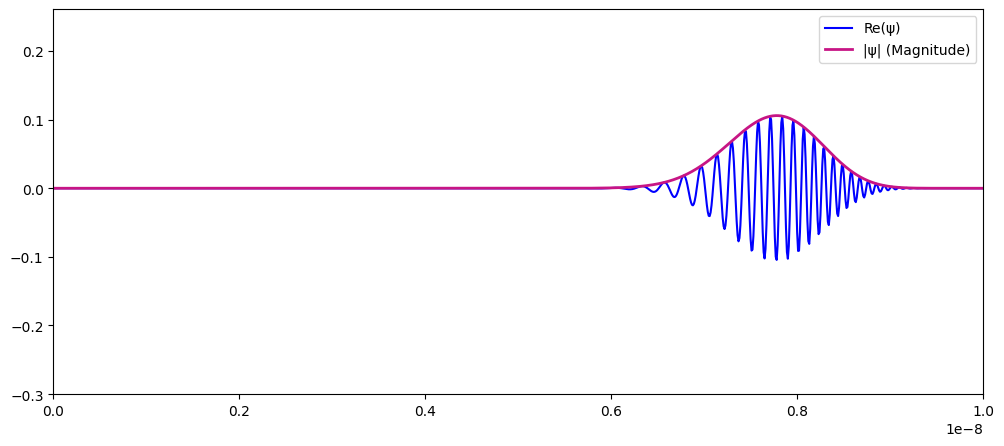

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
from IPython.display import display, clear_output

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant
m_e = 9.10938356e-31  # Electron mass
L = 1e-8              # Length of the quantum box
N = 1000              # Number of spatial slices
a = L / (N - 1)       # Spatial step size
x = np.linspace(0, L, N)  # Spatial grid points
h = 1e-18             # Time step for the evolution

# Potential energy is zero inside the box
V = np.zeros(N)

# Initial wave packet
  # Note: The initial wavefunction is a Gaussian wave packet centered at \x_0
  # with momentum p = \hbar \kappa, meaning the electron starts as a localized
  # particle with some kinetic energy.
x0 = L / 2            # Initial center of the wave packet
sigma = 1e-10         # Width of the Gaussian packet
k = 5e10              # Wavenumber of the packet
# Construct a Gaussian wave packet with a plane wave component
psi = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k * x)
psi /= np.sqrt(np.sum(np.abs(psi)**2))  # Normalize to unit probability

# Crank-Nicolson matrices A and B
alpha = h * 1j * hbar / (4 * m_e * a**2)  # Alpha coefficient for the discretized Hamiltonian
# Matrices A and B for implicit and explicit steps
A = np.zeros((3, N), dtype=complex)
B = np.zeros((3, N), dtype=complex)

# Fill diagonal values for A and B
A[1, :] = 1 + 2 * alpha         # Main diagonal of A
A[0, 1:] = -alpha               # Upper diagonal of A
A[2, :-1] = -alpha              # Lower diagonal of A

B[1, :] = 1 - 2 * alpha         # Main diagonal of B
B[0, 1:] = alpha                # Upper diagonal of B
B[2, :-1] = alpha               # Lower diagonal of B

# Boundary conditions for matrices
A[1, 0] = A[1, -1] = 1          # Dirichlet boundary for A
A[0, 1] = A[2, -2] = 0          # No off-diagonal contribution at boundaries
B[1, 0] = B[1, -1] = 1          # Dirichlet boundary for B
B[0, 1] = B[2, -2] = 0          # No off-diagonal contribution at boundaries

# Animation setup
fig, ax = plt.subplots(figsize=(12, 5))
line, = ax.plot(x, np.real(psi), label="Re(ψ)", color="blue")  # Real part
line_mag, = ax.plot(x, np.abs(psi), label="|ψ| (Magnitude)", color="mediumvioletred", linewidth=2)  # Magnitude
ax.set_ylim(-0.3, 1.1 * max(np.abs(psi)))  # Adjust y-limits
ax.set_xlim(0, L)
ax.legend()

display_handle = display(fig, display_id=True)

# Time evolution loop
for t in range(500):  # Adjust the number of steps as needed
    """
    For each time step, we calculate a new state for \psi based on the energy
    operator a.k.a. the Hamiltonian, then it normalizes \psi to maintain the
    total probability at 1. This ensures that the probability of finding the
    particle in the box does not change over time.
    """
    # Compute B @ psi for the right-hand side vector
    v = B[1] * psi
    v[1:] += B[0, 1:] * psi[:-1]  # Upper diagonal contribution
    v[:-1] += B[2, :-1] * psi[1:]  # Lower diagonal contribution

    # Solve the linear system A * psi_new = v
    psi = solve_banded((1, 1), A, v)

    # Update the plot with real part of psi
    line.set_ydata(np.real(psi))
    line_mag.set_ydata(np.abs(psi))    # Update magnitude

    display_handle.update(fig) # Smooth update

clear_output(wait=False) # Ensure display is updated at the end

**Based on the animation:**
  - The wave packet initially localized around $x_0$ represents a high probability of finding the electron near this position.
  - The plot for the magnitude represents the probability per unit length of finding the electron at position $x$ at time $t$ a.k.a PDF.
  - The probability density initially peaks around the center of the box, then spreads and reflects off the boundaries.
  - After a long time, the electron's probability distribution eventually even out.

**Significance of the parameters:**

In general, these parameters define the initial state of the wave packet.
  - $\sigma$: initial width of the wave packet. Decreasing $\sigma$ will make the wave packet more localized (position is more known). This translates to a higher uncertainty in momentum.

  - $\kappa$: momentum of the wave packet. A larger $\kappa$ corresponds to higher momentum and therefore, higher kinetic energy. This will cause the wave packet to move more rapidly in space.

  -$x_0$: initial position of the wave packet's center. Indicates where in the box (between $x = 0$ and $x = L$) the wave packet starts; represents the initial expected position of the particle within the box.



**Analysis:**

Boundary conditions of the potential well (box)
   - The electron is confined in a 1D infinite potential well (box) with length $L$ and boundary conditions: $\psi(x=0)=\psi(x=L) = 0$.
   - These boundary conditions prevent any flux or leakage of probability density outside the box, leading to standing wave-like behavior within the confines of the box.
   - Put simply, the wavefunction vanish at the walls because the particle cannot exist outside the box.

Quantization of energy
   - For an electron in a box of length $L$, the energy levels $E_n$ are given by $E_n = \frac{n^2 \pi^2 \hbar^2}{2 m_e L^2}$ where $n$ is a positive integer (1, 2, 3, ...) representing the quantum number of the state.
   - As seen in the plot, the wave packet is quantized as it spreads and oscillates over time. This is a physical manifestation of the interference of different energy eigenstates given by the Hamiltonian operator.

Dispersion of the wave packet
  - The Gaussian spread in $\kappa$ leads to the uncertainty in momentum, and in turn an uncertainty in energy. This causes different components of the wavefunction to move at different speeds.
  - The localized wave packet (small $\sigma$) had a large spread in momentum. Over time, the momentum components caused the packet to spread out spatially, which we see as the gradual stretching of $\psi(x, t)$ in the simulation.

Physical interpretation of the wavefunction, $\psi$
   - The width of the wave packet (determined by $\sigma$) shows the trade-off between position and momentum uncertainty. A narrower wave packet has a smaller spatial uncertainty, implying that the particle's position is more precisely known. However, due to the Heisenberg Uncertainty Principle, this results in greater uncertainty in momentum. Conversely, a wider wave packet reduces the uncertainty in momentum, but the particle's position becomes less well-defined.
   - The real and imaginary parts of $\psi$ oscillate in spacetime. This shows the probabilistic description of the particle's position $ |\psi(x, t)|^2 = \text{Re}(\psi)^2 + \text{Im}(\psi)^2 $.
   - In the animation, the oscillation indicates the interference effects among different energy states in the box.

The Crank-Nicolson method
   - The Crank-Nicolson method conserves *unitarity*, meaning that the total probability (integral of $|\psi(x, t)|^2 $ over all space) remains constant, as required in quantum mechanics.
   - In the simulation, this approach provides a realistic time evolution without unphysical losses or gains in probability, making it ideal for solving the 1D Schrödinger equation in a confined potential.